### Goal : Decompose time-series data into three terms: trend, period & random


Resources/Bibliograpy:
- [Basic Fourier transform](http://www.phys.nsu.ru/cherk/fft.pdf)
- [Fourier Decomposition Analysis for non-linear & non-stationary data](https://royalsocietypublishing.org/doi/10.1098/rspa.2016.0871)
- [Empirical Mode Decomposition (EMD)]()
- [Ensemble Empirical Mode Decomposition (EEMD)](https://www.worldscientific.com/doi/abs/10.1142/S1793536909000047)
- [EEMD + LSTM](https://link.springer.com/article/10.1007/s11269-019-02345-1)

In [9]:
# In the root of the repo run "pip install --editable ."

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

# Replace sample_func_dir by the name of directory in src/ and replace sample_func_file the
# file name in src/sample_func_dir

from src.data.import_data import import_df_from_zip_pkl
from src.data.make_dataset import *
from scipy import fftpack
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
# Load data 
csv_index   = 15
synth_name  = "basic"
path_to_zip = "../data/raw/synthetic_" + synth_name + ".zip"
df_basic    = import_df_from_zip_pkl(path_to_zip, index=csv_index, verbose=True)
synth_name  = "soil"
path_to_zip = "../data/raw/synthetic_" + synth_name + ".zip"
df_soil     = import_df_from_zip_pkl(path_to_zip, index=csv_index, verbose=True)

time for importing dataframe: 0.63 seconds
time for importing dataframe: 0.68 seconds


In [33]:
# Preprocess data
df_basic = downsample_dataframe(df_basic, night_method='basic', clip_method='universal')
df_soil  = downsample_dataframe(df_soil, night_method='basic', clip_method='universal')

(230340, 8)
(165847, 8)


In [15]:
df_basic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2015-01-01 00:00:00-05:00 to 2019-12-31 00:00:00-05:00
Freq: D
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Power          1826 non-null   float64
 1   POA            1826 non-null   float64
 2   Tamb           1826 non-null   float64
 3   Wind           1826 non-null   float64
 4   Degradation    1826 non-null   float64
 5   Soiling        1826 non-null   float64
 6   Faults         1826 non-null   float64
 7   minute_of_day  1826 non-null   float64
dtypes: float64(8)
memory usage: 128.4 KB


In [16]:
df_soil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2015-01-01 00:00:00-05:00 to 2019-12-31 00:00:00-05:00
Freq: D
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Power          1826 non-null   float64
 1   POA            1826 non-null   float64
 2   Tamb           1826 non-null   float64
 3   Wind           1826 non-null   float64
 4   Degradation    1826 non-null   float64
 5   Soiling        1826 non-null   float64
 6   Faults         1826 non-null   float64
 7   minute_of_day  1826 non-null   float64
dtypes: float64(8)
memory usage: 128.4 KB


In [12]:
df.head()

,Power,POA,Tamb,Wind,Degradation,Soiling,Faults,minute_of_day
datetime,,,,,,,,
2015-01-01 00:00:00-05:00,376.825397,169.214286,7.361111,0.0,0.999982,1.0,1.0,759.420635
2015-01-02 00:00:00-05:00,381.884462,171.207171,7.328287,0.0,0.999945,1.0,1.0,760.561753
2015-01-03 00:00:00-05:00,384.142857,172.051587,7.291667,0.0,0.999905,1.0,1.0,761.595238
2015-01-04 00:00:00-05:00,386.715415,172.956522,7.251383,0.0,0.999865,1.0,1.0,762.624506
2015-01-05 00:00:00-05:00,389.570866,173.980315,7.217323,0.0,0.999831,1.0,1.0,763.649606


In [5]:
df.head() # old importing functions

,Power,POA,Tamb,Wind,Degradation_rate_per_yr,soiling,year,month,day,hour,minute_of_hour,minute_of_day
2015-01-01 00:00:00-05:00,376.821429,169.214286,7.361111,0.0,-0.01436,1.0,2015.0,1.0,1.0,12.150794,30.373016,759.420635
2015-01-02 00:00:00-05:00,381.860558,171.207171,7.328287,0.0,-0.01436,1.0,2015.0,1.0,2.0,12.171315,30.282869,760.561753
2015-01-03 00:00:00-05:00,384.126984,172.051587,7.291667,0.0,-0.01436,1.0,2015.0,1.0,3.0,12.190476,30.166667,761.595238
2015-01-04 00:00:00-05:00,386.707510,172.956522,7.251383,0.0,-0.01436,1.0,2015.0,1.0,4.0,12.209486,30.055336,762.624506
2015-01-05 00:00:00-05:00,389.547244,173.980315,7.217323,0.0,-0.01436,1.0,2015.0,1.0,5.0,12.228346,29.948819,763.649606


In [44]:
L = len(df["Power"].to_numpy()) # length of signal
T = 1 # [day] # sampling period
Fs = 1/T # [1/day] # sampling frequency
freq = Fs*np.arange(L/2)/L

df_fft = fftpack.fft(df["Power"].to_numpy()) # Fourier transform 
# division por L -> Parseval's theorem!! - chequar esto es asi en MATLAB, en python?

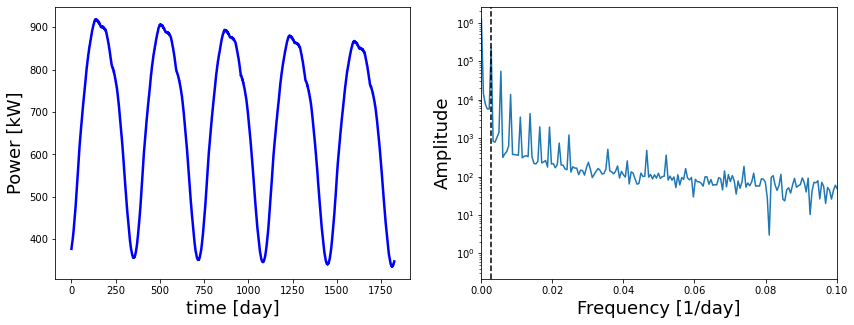

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
ax[0].plot(df["Power"].values, lw=2.5, color="blue")    # plot time series
ax[0].set_ylabel("Power [kW]", fontsize=18)
ax[0].set_xlabel("time [day]", fontsize=18)

ax[1].plot(freq, np.abs(df_fft[0:int(L/2)])) # plot freq domain
ax[1].axvline(1/365, ls="--", color="k") # this is the year frequency

ax[1].set_ylabel("Amplitude", fontsize=18)
ax[1].set_xlabel("Frequency [1/day]", fontsize=18)
ax[1].set_xlim([0, 0.1])
#ax[1].set_xscale("log")
ax[1].set_yscale("log")

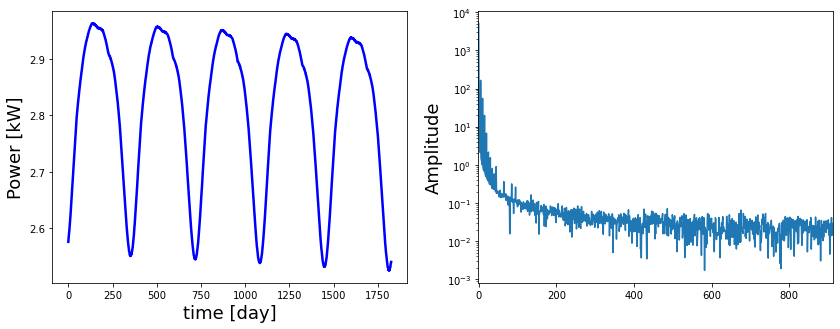

In [12]:
power     = np.log10(df["Power"].to_numpy())
power_fft = fftpack.fft(power)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
ax[0].plot(power, lw=2.5, color="blue")    # plot time series
ax[0].set_ylabel("Power [kW]", fontsize=18)
ax[0].set_xlabel("time [day]", fontsize=18)

ax[1].plot(np.abs(power_fft)) # plot freq domain

ax[1].set_ylabel("Amplitude", fontsize=18)
#ax[1].set_xlabel("Frequency", fontsize=18)
ax[1].set_xlim([-1, 914])
ax[1].set_yscale("log")

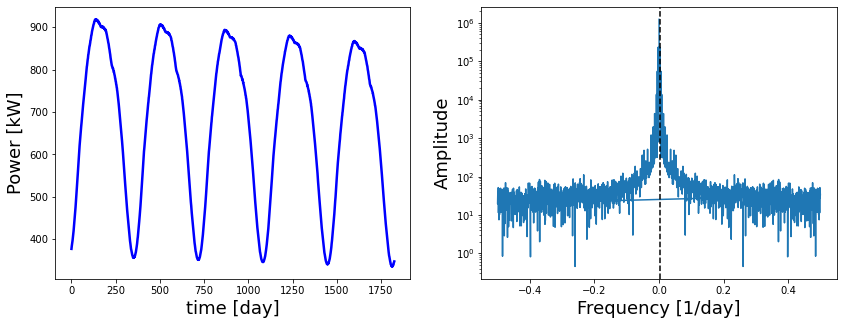

In [50]:
power_fft = fftpack.fft(df["Power"].to_numpy())
sample_freq = fftpack.fftfreq(df["Power"].to_numpy().size, d=1)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
ax[0].plot(df["Power"].values, lw=2.5, color="blue")    # plot time series
ax[0].set_ylabel("Power [kW]", fontsize=18)
ax[0].set_xlabel("time [day]", fontsize=18)

ax[1].plot(sample_freq, np.abs(power_fft)) # plot freq domain
ax[1].axvline(1/365, ls="--", color="k") # this is the year frequency

ax[1].set_ylabel("Amplitude", fontsize=18)
ax[1].set_xlabel("Frequency [1/day]", fontsize=18)
#ax[1].set_xlim([0, 0.1])
#ax[1].set_xscale("log")
ax[1].set_yscale("log")

/home/maria/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'time [day]')

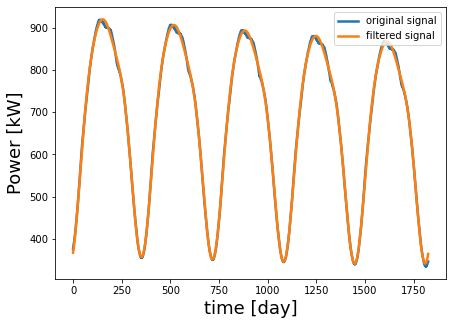

In [56]:
# remove all the hight frequencies
high_freq_fft = power_fft.copy()
high_freq_fft[np.abs(sample_freq) > 0.01] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(df["Power"].to_numpy(), label="original signal", lw=2.5)
ax.plot(filtered_sig, label="filtered signal", lw=2.5)
ax.legend(loc="best")
ax.set_ylabel("Power [kW]", fontsize=18)
ax.set_xlabel("time [day]", fontsize=18)

### Plot FT for basic and soiling for (a) daily frequency

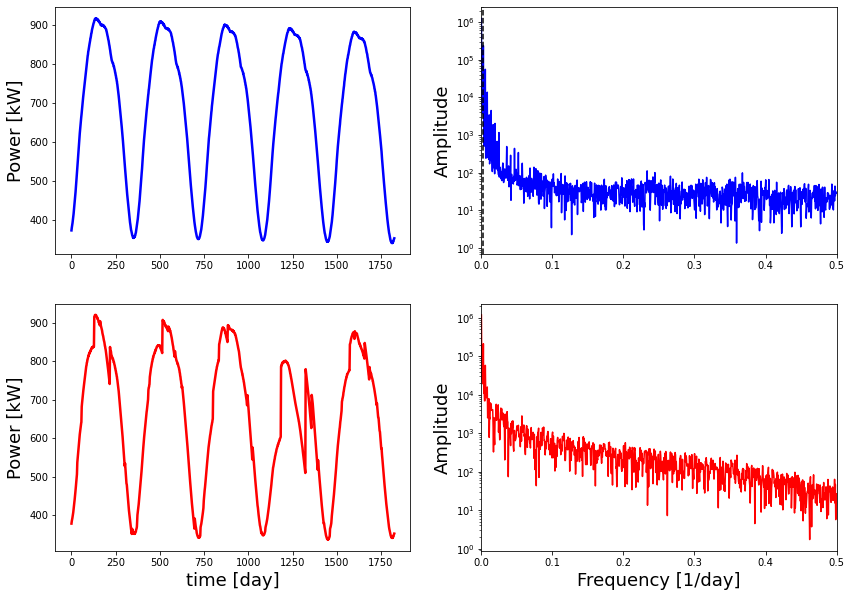

In [35]:
size              = df_basic["Power"].to_numpy().size
power_basic       = fftpack.fft(df_basic["Power"].to_numpy(), size)
sample_freq_basic = fftpack.fftfreq(size, d=1)

power_soil        = fftpack.fft(df_soil["Power"].to_numpy(), size)
sample_freq_soil  = fftpack.fftfreq(size, d=1)


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
ax[0, 0].plot(df_basic["Power"].to_numpy(), lw=2.5, color="blue")    # plot time series
ax[1, 0].plot(df_soil["Power"].to_numpy(), lw=2.5, color="red")    # plot time series
ax[0, 0].set_ylabel("Power [kW]", fontsize=18)
ax[1, 0].set_ylabel("Power [kW]", fontsize=18)
ax[1, 0].set_xlabel("time [day]", fontsize=18)

ax[0, 1].plot(sample_freq_basic[0:int(size/2)], np.abs(power_basic[0:int(size/2)]), color="blue") # plot freq domain
ax[0, 1].axvline(1/365, ls="--", color="k") # this is the year frequency
ax[1, 1].plot(sample_freq_soil[0:int(size/2)], np.abs(power_soil[0:int(size/2)]), color="red") # plot freq domain

ax[0, 1].set_ylabel("Amplitude", fontsize=18)
ax[1, 1].set_ylabel("Amplitude", fontsize=18)
ax[1, 1].set_xlabel("Frequency [1/day]", fontsize=18)
ax[0, 1].set_xlim([0, 0.5])
ax[1, 1].set_xlim([0, 0.5])
ax[0, 1].set_yscale("log")
ax[1, 1].set_yscale("log")

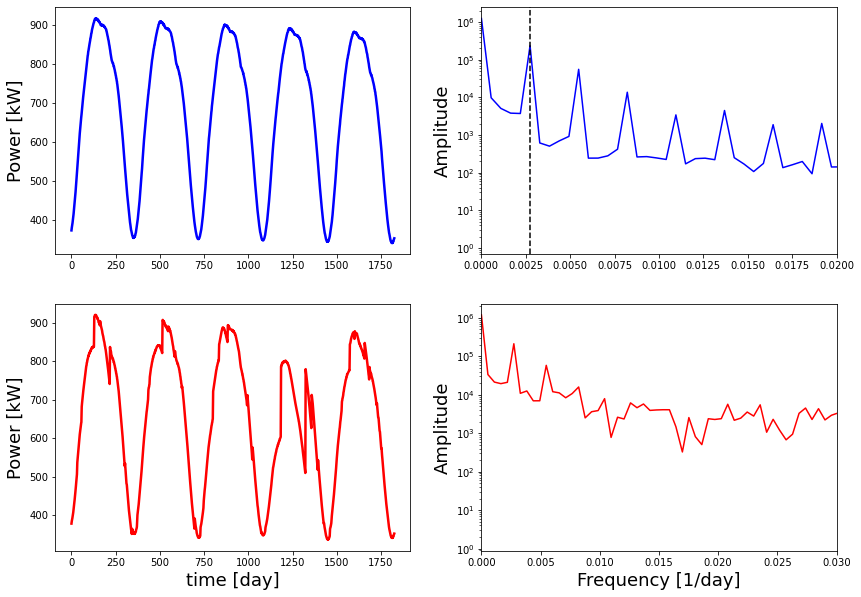

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
ax[0, 0].plot(df_basic["Power"].to_numpy(), lw=2.5, color="blue")    # plot time series
ax[1, 0].plot(df_soil["Power"].to_numpy(), lw=2.5, color="red")    # plot time series
ax[0, 0].set_ylabel("Power [kW]", fontsize=18)
ax[1, 0].set_ylabel("Power [kW]", fontsize=18)
ax[1, 0].set_xlabel("time [day]", fontsize=18)

ax[0, 1].plot(sample_freq_basic[0:int(size/2)], np.abs(power_basic[0:int(size/2)]), color="blue") # plot freq domain
ax[0, 1].axvline(1/365, ls="--", color="k") # this is the year frequency
ax[1, 1].plot(sample_freq_soil[0:int(size/2)], np.abs(power_soil[0:int(size/2)]), color="red") # plot freq domain

ax[0, 1].set_ylabel("Amplitude", fontsize=18)
ax[1, 1].set_ylabel("Amplitude", fontsize=18)
ax[1, 1].set_xlabel("Frequency [1/day]", fontsize=18)
ax[0, 1].set_xlim([0, 0.02])
ax[1, 1].set_xlim([0, 0.03])
ax[0, 1].set_yscale("log")
ax[1, 1].set_yscale("log")

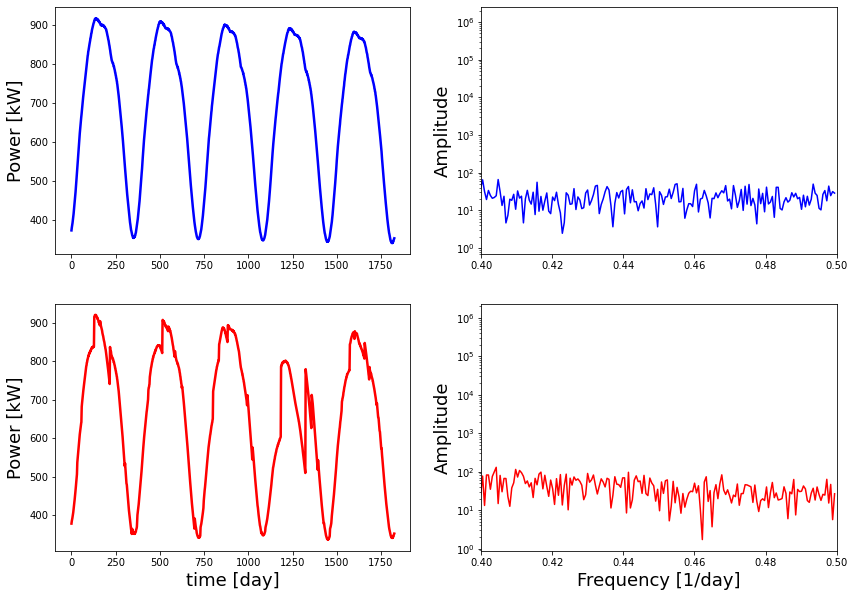

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
ax[0, 0].plot(df_basic["Power"].to_numpy(), lw=2.5, color="blue")    # plot time series
ax[1, 0].plot(df_soil["Power"].to_numpy(), lw=2.5, color="red")    # plot time series
ax[0, 0].set_ylabel("Power [kW]", fontsize=18)
ax[1, 0].set_ylabel("Power [kW]", fontsize=18)
ax[1, 0].set_xlabel("time [day]", fontsize=18)

ax[0, 1].plot(sample_freq_basic[0:int(size/2)], np.abs(power_basic[0:int(size/2)]), color="blue") # plot freq domain
ax[0, 1].axvline(1/365, ls="--", color="k") # this is the year frequency
ax[1, 1].plot(sample_freq_soil[0:int(size/2)], np.abs(power_soil[0:int(size/2)]), color="red") # plot freq domain

ax[0, 1].set_ylabel("Amplitude", fontsize=18)
ax[1, 1].set_ylabel("Amplitude", fontsize=18)
ax[1, 1].set_xlabel("Frequency [1/day]", fontsize=18)
ax[0, 1].set_xlim([0.4, 0.5])
ax[1, 1].set_xlim([0.4, 0.5])
ax[0, 1].set_yscale("log")
ax[1, 1].set_yscale("log")

### Plot FT for basic and soiling for (a) hourly frequency